# <center>**Introduction to Regression with statsmodels in Python**</center>

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git -q

In [2]:
url_ad_conversion = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/ad_conversion.csv"
url_churn = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/churn.csv"
url_fish = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/fish.csv"
url_height_data = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/height_data.csv"
url_motor_insurance = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/motor_insurance.csv"
url_snp500 = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/sp500.csv"
url_real_estate = "/content/CAREER-TRACK-Data-Scientist-with-Python/20_Introduction_to_Regression_with_statsmodels_in_Python/_dataset/taiwan_real_estate.csv"

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Linear Regression & Logistic Regression**

| Feature | Linear Regression                  | Logistic Regression                           |
|-------------------------|------------------------------------|------------------------------------------------|
| Dependent Variable      | Continuous                         | Binary or Categorical                          |
| Nature of Relationship | Linear                             | Non-linear                                     |
| Output                 | Continuous values                  | Probability values (0 to 1)                    |
| Assumption              | Linearity, Normality, Homoscedasticity | Linearity, Independence of Errors, No Multicollinearity |
| Algorithm              | `Ordinary Least Squares (OLS)`       |`Maximum Likelihood Estimation(MLE)`                  |
| Error Measurement       | `Residual Sum of Squares (RSS)`       | `Log-Likelihood`, `Deviance`                       |
| Evaluation Metric      | Root Mean Squared Error (RMSE), R-squared | Accuracy, Precision, Recall, F1-score           |
| Interpretation          | Coefficients represent slope and intercept | Coefficients represent odds ratios              |
| Multiple Variables     | Multiple linear regression        | Multinomial logistic regression, Ordinal logistic regression |
| Implementation         | Continuous values prediction       | Classification                                 |
| Example Use Cases       | Predicting house prices, stock prices | Predicting customer churn, spam detection      |


## **Linear Regression**:

- Linear regression is used when the dependent variable is continuous and the  relationship between the **dependent variable** and **independent variable**s is linear.

- It assumes `linearity`, `normality`, and `homoscedasticity` (equal variance of - errors) in the data.

- The output of linear regression is `continuous values`, allowing for the - prediction of values within a certain range.

- The algorithm used for linear regression is `Ordinary Least Squares` (`OLS`), which minimizes the sum of squared residuals.

- Evaluation metrics for linear regression include the `root mean squared error` (`RMSE`) and `R-squared`.

## **Logistic Regression**:

- Logistic regression is used when the dependent variable is `binary` or `categorical`. 

- It models the probability of an event occurring.

- It assumes a linear relationship between the independent variables and the  `log-odds` of the dependent variable, making it suitable for non-linear relationships.

- The output of logistic regression is probability values between `0` and `1`, which can be used for classification tasks.

- The algorithm used for logistic regression is `Maximum Likelihood Estimation` (`MLE`), which estimates the parameters that maximize the likelihood of observing the data.

- Evaluation metrics for logistic regression include `accuracy`, `precision`, `recall`, and `F1-score`.

- The coefficients in logistic regression represent odds ratios, indicating the  change in odds for a one-unit change in the independent variable.

- Logistic regression can be extended to handle multiple classes (multinomial logistic regression) or ordered categories (ordinal logistic regression).

# **1️⃣Simple Linear Regression Modeling**

## **Motor Insurance Data**

In [4]:
data = pd.read_csv(url_motor_insurance)
data.head(5)

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373


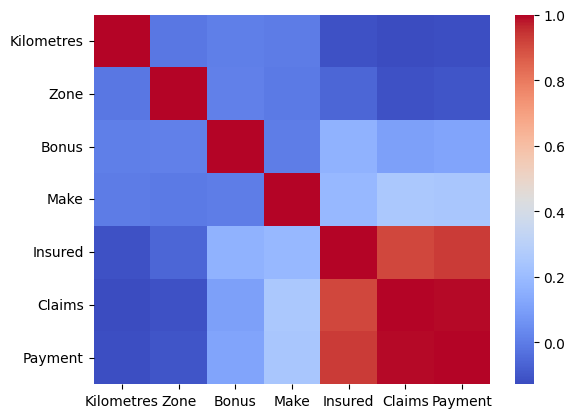

In [5]:
sns.heatmap(data.corr(), cmap="coolwarm")
plt.show()

In [6]:
# correlation btw # claims and payment
data['Claims'].corr(data['Payment'])

0.9954002537674652

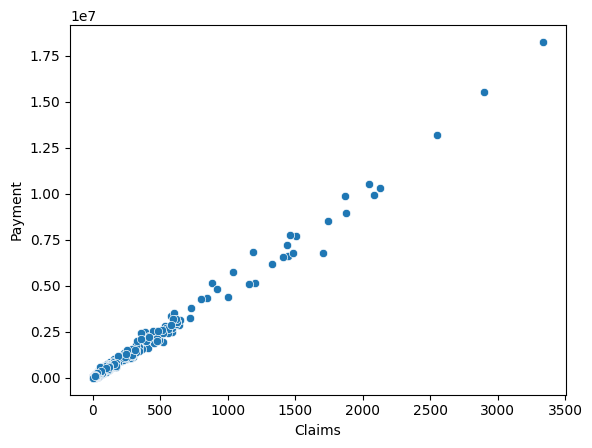

In [7]:
# visualize important variables in the dataset
sns.scatterplot(x='Claims', y='Payment', data=data)

plt.show()

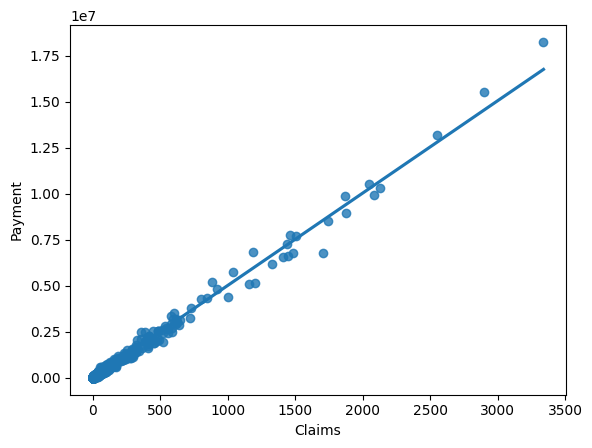

In [8]:
# adding a trend line to the scatter plot
sns.regplot(x='Claims',
            y='Payment', 
            data=data,
            ci=None) # no confidence interval
plt.show()

In [9]:
## Fitting a linear regression

# import necessary library
from statsmodels.formula.api import ols

# create ols model
mdl_payment_vs_claims = ols(formula='Payment ~ Claims', data=data).fit()

# get model parameters
print(mdl_payment_vs_claims.params)
print(mdl_payment_vs_claims.summary())

Intercept   -3362.294467
Claims       5020.077648
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Payment   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.353e+05
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:59:47   Log-Likelihood:                -28161.
No. Observations:                2182   AIC:                         5.633e+04
Df Residuals:                    2180   BIC:                         5.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

## **Fish data**



In [10]:
# import 'fish' data
fish = pd.read_csv(url_fish)
fish.head(5)

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


In [11]:
print(fish['species'].nunique())
print(fish['species'].unique())

4
['Bream' 'Roach' 'Perch' 'Pike']


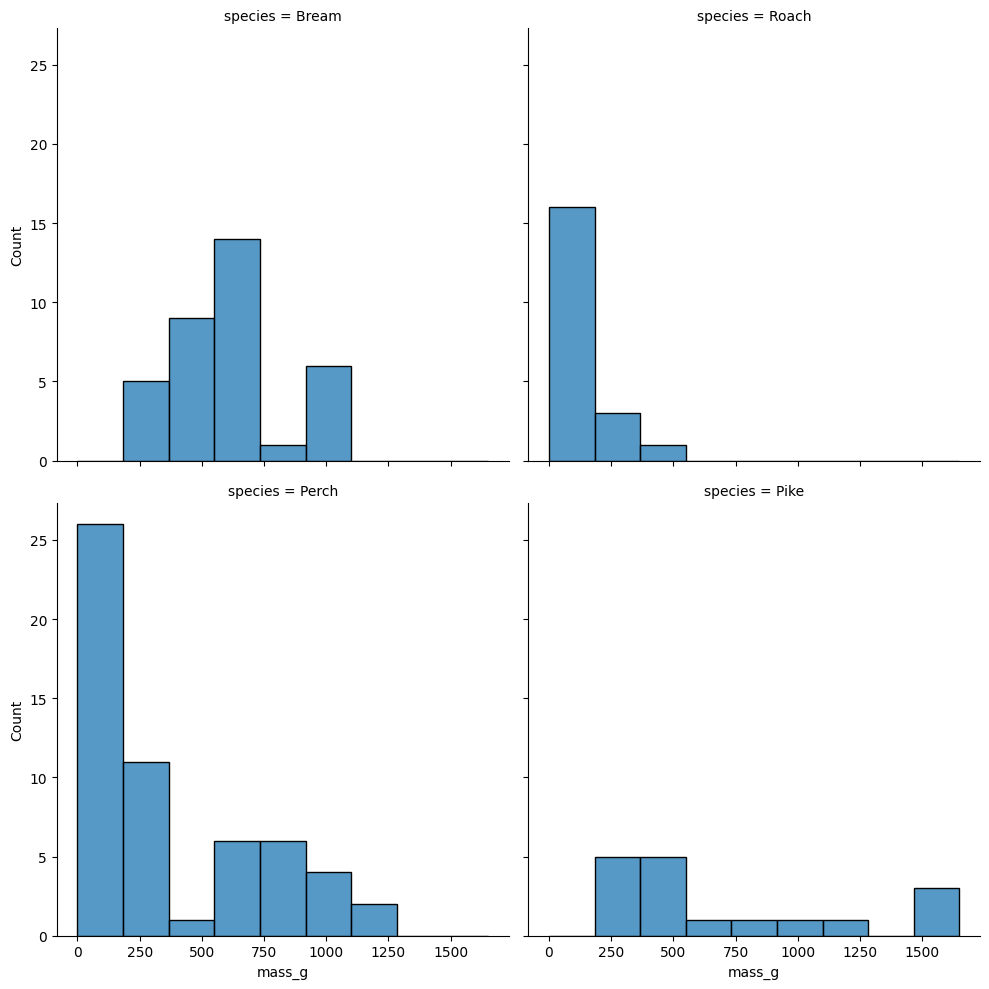

In [12]:
# plot histograms for 'mass_g'(Mass in grams) by species of fish
sns.displot(data=fish,
            x='mass_g',    # varible of intrest 
            col='species', # varible that we want to spit on
            col_wrap=2,
            bins=9)
plt.show()

In [13]:
# summary stats
summary_stas = fish.groupby("species")["mass_g"].mean()
print(summary_stas)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


**Model with Intercept**

In [14]:
## run lenear regression
# this uses fish species 'Bream' as the comparison group

#from statsmodels.formula.api import ols
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


**Model without Intercept**

In [15]:
# run same model as above, but with '0' as the comparison group
# Essentially, we're suppressing the intercept

#from statsmodels.formula.api import ols
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


$\color{red}{\textbf{These coefficients are relevant to the intercept!}}$

## **A tale of two variables**


#### **Visualizing two numeric variables**


In [16]:
taiwan_real_estate = pd.read_csv(url_real_estate)
taiwan_real_estate.head(3)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649



**Variable Meaning**

- `dist_to_mrt_station_m` $\rightarrow$	Distance to nearest MRT metro station, in meters.
- `n_convenience` $\rightarrow$	No. of convenience stores in walking distance.
- `house_age_years` $\rightarrow$	The age of the house, in years, in three groups.
- `price_twd_msq` $\rightarrow$	House price per unit area, in New Taiwan dollars per meter squared.

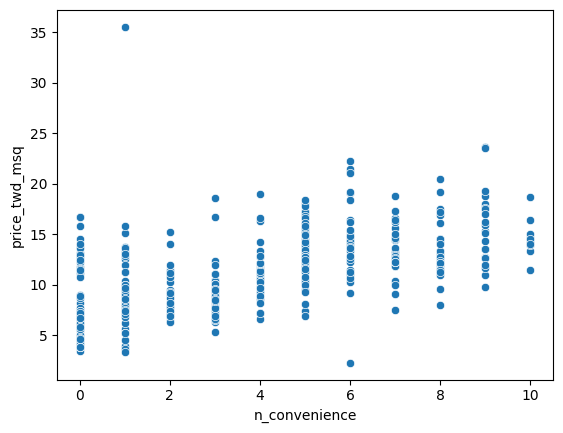

In [17]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Show the plot
plt.show()

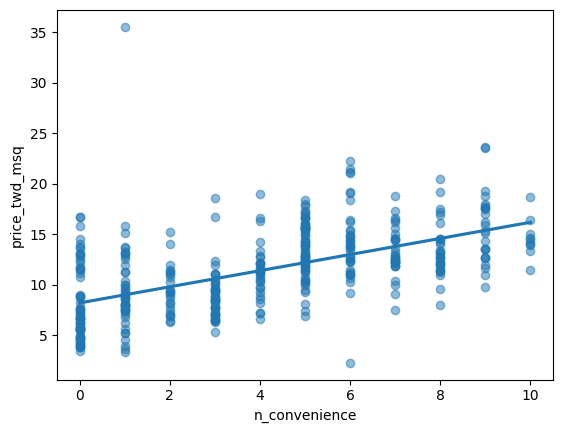

In [18]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None,                    # ci=None argument disables the confidence interval for the trend line. 
            scatter_kws={'alpha': 0.5}) # Sets the transparency of the scatter points to 0.5.

# Show the plot
plt.show()

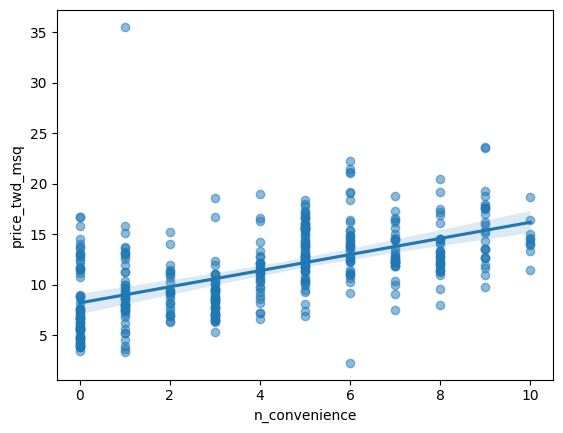

In [19]:
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=100,
            scatter_kws={'alpha': 0.5})

plt.show()

## **Fitting a linear regression**


#### **Linear regression with `ols()`**


In [20]:
from statsmodels.formula.api import ols

# Create a pandas DataFrame with your data
d = {'x': [1, 2, 3, 4, 5],
     'y': [2, 4, 5, 4, 5]}
df = pd.DataFrame(d)

# Fit a linear regression model
model = ols(formula='y ~ x', data=df).fit()

# Print the model summary
print(model.params)
print(model.summary())

Intercept    2.2
x            0.6
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Mon, 12 Jun 2023   Prob (F-statistic):              0.124
Time:                        20:59:50   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In this example, `ols` is used to `fit` a **simple linear regression** model 
where:
- `y` is the `dependent` variable $\rightarrow$ Response variable (`left`)
- `x` is the `independent` variable $\rightarrow$ explanatory variable(`right`) 


In [21]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols(formula='price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


- On an average, a house with zero convenience stores nearby has a price of `8.2242` TWD per square meter.
- If you Increase the number of nearby convenience stores by one, then the expected Increase in house prlce is `0.7981` TWD per square meter.

## **Categorical explanatory variables**


#### **Visualizing numeric vs. categorical**


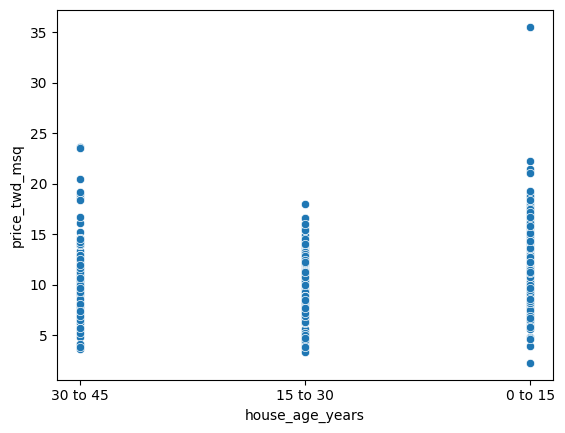

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of price_twd_msq and house_age_years
sns.scatterplot(data=taiwan_real_estate, x="house_age_years", y="price_twd_msq")

# Show the plot
plt.show()

the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

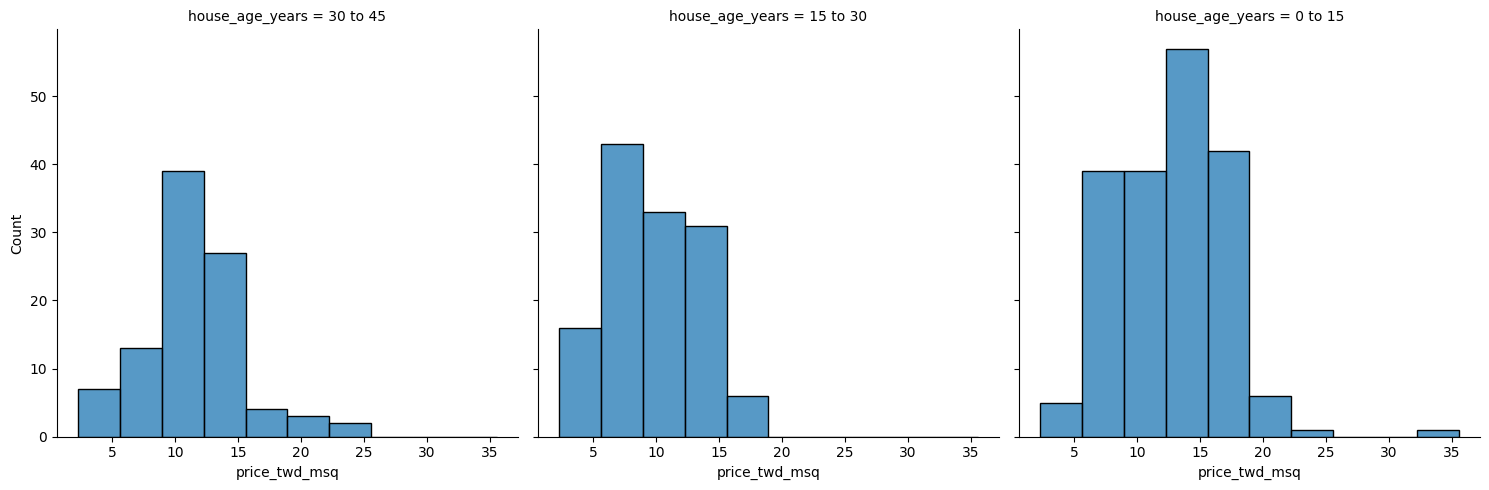

In [23]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
            x="price_twd_msq",
            col="house_age_years",
            bins=10)

# Show the plot
plt.show()

#### **Calculating means by category**


In [24]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


#### **Linear regression with a categorical explanatory variable**

In [25]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


Update the model formula so that no intercept is included in the model. Assign to `mdl_price_vs_age0`

In [26]:
# Create the model without an intercept, fit it
mdl_price_vs_age0 = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


The coefficients of the model are just the means of each category you calculated previously.

# **2️⃣Predictions and model objects**

## **Fish dataset Cont.**

In [27]:
# Subsetting the 'bream' dataset 
bream = fish[fish['species'] == 'Bream']
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


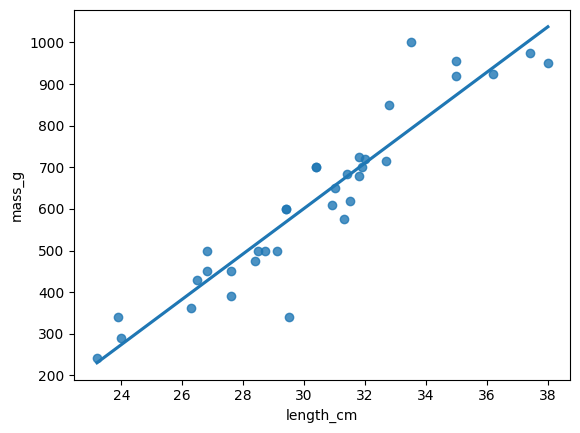

In [28]:
# Create mass vs. length scatter plot
sns.regplot(x='length_cm',
            y='mass_g',
            data=bream,
            ci=None)
plt.show()

In [29]:
# Running OLS model
mdl_mass_vs_length = ols(formula="mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [30]:
# Generate explanatory values to use for prediction
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})
display(explanatory_data.head(2))

,length_cm
0,20
1,21


Predicting Response

In [31]:
# Call "predict()" method
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


variable and predicted response

In [32]:
## Predicting inside a DataFrame

# Generate explanatory values to use for prediction
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})

# Add predicted values next to input column
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))

# display data
print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


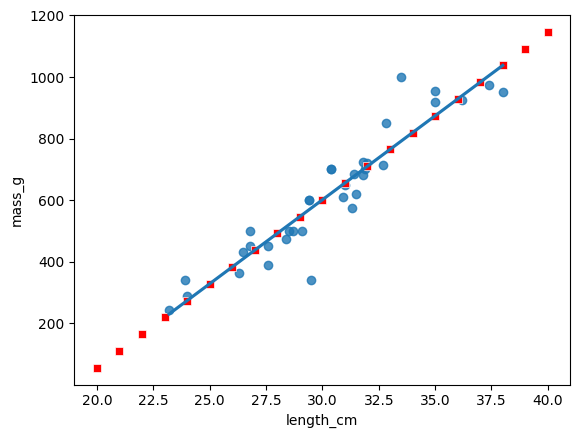

In [33]:
# showing predictions on the same scatter plot

sns.regplot(x='length_cm', y="mass_g", ci=None, data=bream)
sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data, color='red', marker='s')
plt.show()

In [34]:
## Working with model objects

# print predicted values
print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [35]:
# print residual values
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [36]:
# or equivalently
print(bream["mass_g"] - mdl_mass_vs_length.fittedvalues)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [37]:
# output model summary table
print(mdl_mass_vs_length.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.22e-16
Time:                        20:59:53   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [38]:
# alternatively; without print()
mdl_mass_vs_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.22e-16
Time:                        20:59:53   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Pearson's Father son dataset**

In [39]:
# Scatter plot of Pearson's Father/Son height data
father_son = pd.read_csv(url_height_data)
father_son.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Case    1078 non-null   int64  
 1   Father  1078 non-null   float64
 2   Son     1078 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 25.4 KB


In [40]:
# rename the columns
father_son = father_son.rename(columns={'Father': 'father_height_cm', 'Son': 'son_height_cm'})
father_son.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Case              1078 non-null   int64  
 1   father_height_cm  1078 non-null   float64
 2   son_height_cm     1078 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 25.4 KB


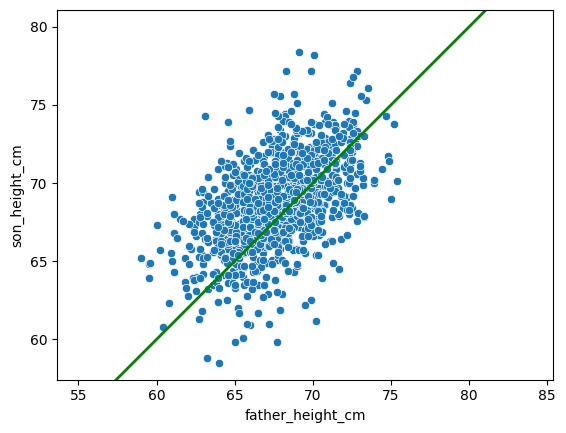

In [41]:
# creating a "figure" object, to enable figure layering
fig = plt.figure()

# plot scatter plot
sns.scatterplot(x="father_height_cm", y="son_height_cm", data=father_son)

# plot strainght line
plt.axline(xy1=(80,80), slope=1, linewidth=2, color="green")

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

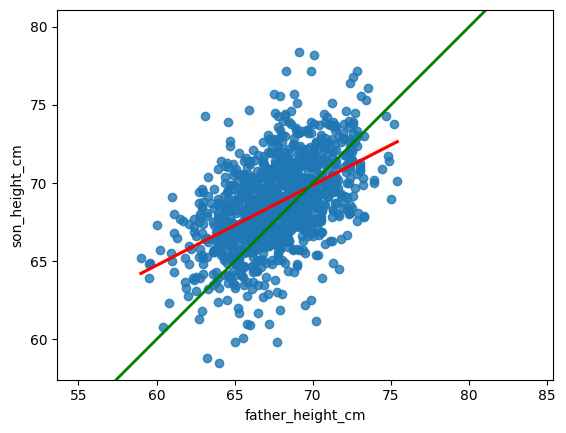

In [42]:
# Adding a regression line to the plot
fig = plt.figure()

sns.regplot(x="father_height_cm",y="son_height_cm", data=father_son, ci = None, line_kws={"color": "red"})
#NOTE: "line_kws" is used to provide style info for the line.["lw" stands for line width].
#E.g., line_kws={"color":"g","alpha":0.5,"lw":4}

plt.axline(xy1=(80,80), slope=1, linewidth=2, color="green")

plt.axis("equal")
plt.show()

In [43]:
# Running a regression
mdl_son_vs_father = ols("son_height_cm ~ father_height_cm", data = father_son).fit()

print(mdl_son_vs_father.params)

Intercept           33.892801
father_height_cm     0.514006
dtype: float64


In [44]:
# Making predictions

really_tall_father = pd.DataFrame({"father_height_cm": [75]})

mdl_son_vs_father.predict(really_tall_father)

0    72.443244
dtype: float64

In [45]:
really_short_father = pd.DataFrame({"father_height_cm": [60]})

mdl_son_vs_father.predict(really_short_father)

0    64.733155
dtype: float64

Really tall fathers have shorter sons, while really short fathers have taller sons.

**Transforming** variables

In [46]:
# checking number of unique fish species in the Fish dataset
fish["species"].value_counts()

Perch    56
Bream    35
Roach    20
Pike     17
Name: species, dtype: int64

In [47]:
# extract "perch" from Fish dataset
perch = fish[fish["species"]=="Perch"]
print(perch)

    species  mass_g  length_cm
55    Perch     5.9        7.5
56    Perch    32.0       12.5
57    Perch    40.0       13.8
58    Perch    51.5       15.0
59    Perch    70.0       15.7
60    Perch   100.0       16.2
61    Perch    78.0       16.8
62    Perch    80.0       17.2
63    Perch    85.0       17.8
64    Perch    85.0       18.2
65    Perch   110.0       19.0
66    Perch   115.0       19.0
67    Perch   125.0       19.0
68    Perch   130.0       19.3
69    Perch   120.0       20.0
70    Perch   120.0       20.0
71    Perch   130.0       20.0
72    Perch   135.0       20.0
73    Perch   110.0       20.0
74    Perch   130.0       20.5
75    Perch   150.0       20.5
76    Perch   145.0       20.7
77    Perch   150.0       21.0
78    Perch   170.0       21.5
79    Perch   225.0       22.0
80    Perch   145.0       22.0
81    Perch   188.0       22.6
82    Perch   180.0       23.0
83    Perch   197.0       23.5
84    Perch   218.0       25.0
85    Perch   300.0       25.2
86    Pe

In [48]:
print(perch.info())
#print(fish[fish["species"]=="perch"].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 55 to 110
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    56 non-null     object 
 1   mass_g     56 non-null     float64
 2   length_cm  56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB
None


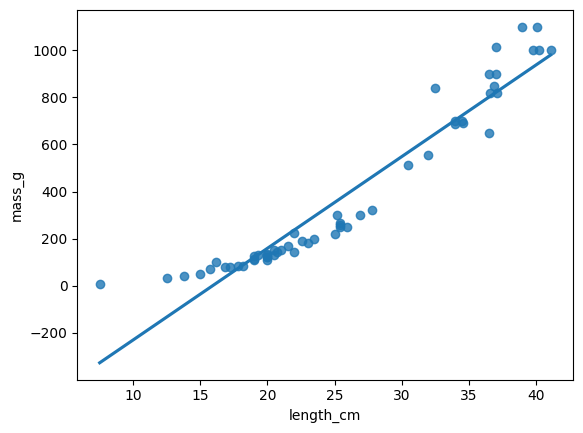

In [49]:
# plot regression line
sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
plt.show()

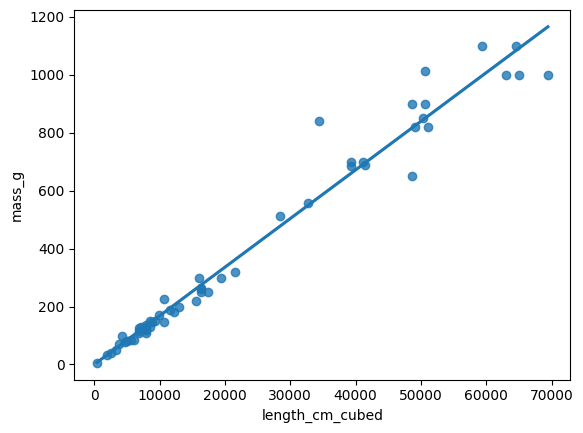

In [50]:
# Plotting mass vs. length cubed
perch = perch.copy()
perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)

plt.show()

In [51]:
# Modeling mass vs. length cubed
mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
mdl_perch.params

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

In [52]:
## Predicting mass vs. length cubed

# generate data for prediction
explanatory_data = pd.DataFrame({"length_cm_cubed": np.arange(10, 41, 5) ** 3,
                                "length_cm": np.arange(10, 41, 5)})

# add predicted values to dataframe
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data)) 

print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


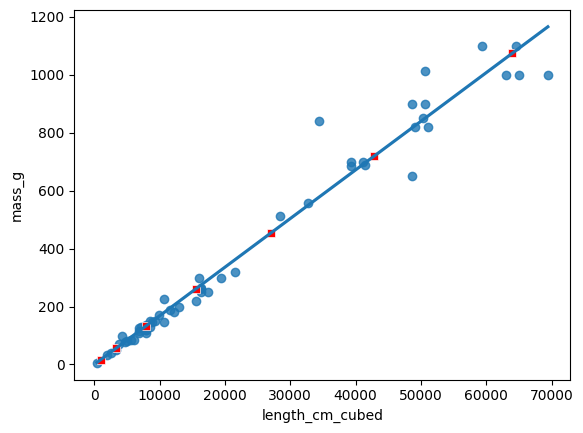

In [53]:
# Plotting mass vs. length cubed
fig = plt.figure()

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)

sns.scatterplot(x="length_cm_cubed", y="mass_g", data=prediction_data, color="red", marker="s")

plt.show()

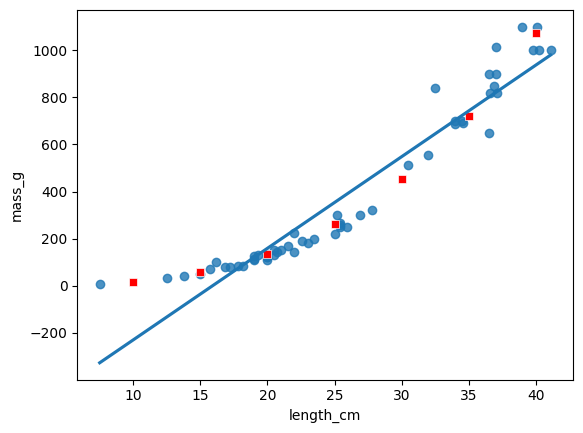

In [54]:
# Plotting mass vs. length
fig = plt.figure()

sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)

sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color="red", marker="s")

plt.show()

In [55]:
## Another example, with Facebook advertising dataset
fb = pd.read_csv(url_ad_conversion)
fb.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


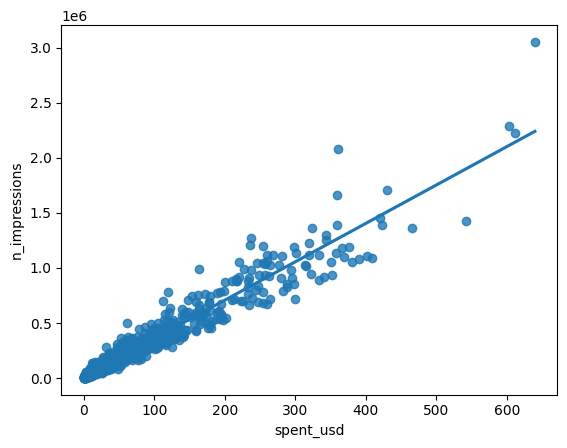

In [56]:
# Plotting advertising data
sns.regplot(x="spent_usd", y="n_impressions", data=fb, ci=None)
plt.show()

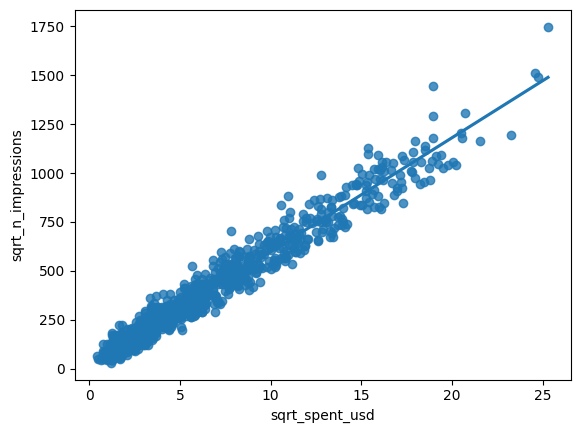

In [57]:
# Trying square root vs square root transformation
fb["sqrt_spent_usd"] = np.sqrt(fb["spent_usd"])

fb["sqrt_n_impressions"] = np.sqrt(fb["n_impressions"])

sns.regplot(x="sqrt_spent_usd", y="sqrt_n_impressions", data=fb, ci=None)

plt.show()

In [58]:
# Model and prediction
mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd", data=fb).fit()

explanatory_data = pd.DataFrame({"sqrt_spent_usd": np.sqrt(np.arange(0, 601, 100)),
                                "spent_usd": np.arange(0, 601, 100)})

prediction_data = explanatory_data.assign(sqrt_n_impressions = mdl_ad.predict(explanatory_data),
                                         n_impressions = mdl_ad.predict(explanatory_data) ** 2)

print(prediction_data)

   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


## **Making predictions**



**Variable Meaning**

- `dist_to_mrt_station_m` $\rightarrow$	Distance to nearest MRT metro station, in meters.
- `n_convenience` $\rightarrow$	No. of convenience stores in walking distance.
- `house_age_years` $\rightarrow$	The age of the house, in years, in three groups.
- `price_twd_msq` $\rightarrow$	House price per unit area, in New Taiwan dollars per meter squared.

In [59]:
taiwan_real_estate.head(3)

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649


#### **Predicting house prices**


In [60]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})
print(explanatory_data.head(),"\n")

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
print(prediction_data)

   n_convenience
0              0
1              1
2              2
3              3
4              4 

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


#### **Visualizing predictions**


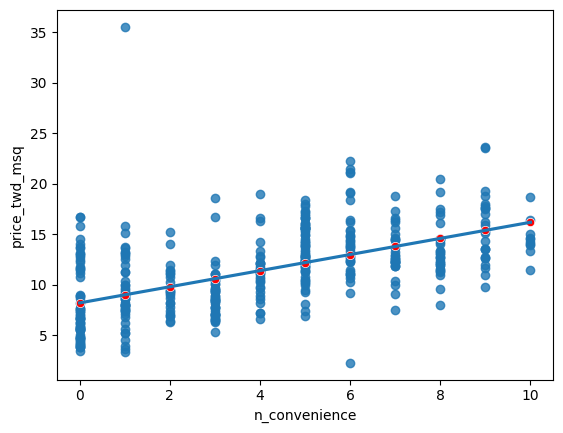

In [61]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)

# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color='red')

# Show the layered plot
plt.show()

#### **The limits of prediction**


In [62]:
import pandas as pd

# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience': [-1, 2.5]})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(impossible)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       7.426158
1               1      10.219437
2               2            NaN
3               3            NaN
4               4            NaN
5               5            NaN
6               6            NaN
7               7            NaN
8               8            NaN
9               9            NaN
10             10            NaN


## **Working with model objects**


#### **Extracting model elements**


In [63]:
print(mdl_price_vs_conv.params)
print("="*78)
print(mdl_price_vs_conv.fittedvalues)
print("="*78)
print(mdl_price_vs_conv.resid)
print("="*78)
print(mdl_price_vs_conv.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           3.41e-37
Time:                        20:59:57   Log-Likelihood:                -1091.1
No. Observations:                 414   

#### **Manually predicting house prices**


In [64]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq =  slope*explanatory_data + intercept 
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## **Regression to the mean**


#### **Plotting consecutive portfolio returns**


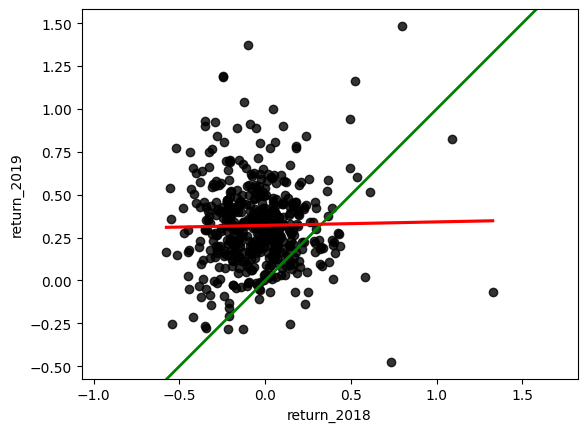

In [65]:
sp500_yearly_returns = pd.read_csv(url_snp500)

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y="return_2019",
            data=sp500_yearly_returns,
            ci=None, color="black",
            line_kws={"color": "red"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

#### **Modeling consecutive returns**


In [66]:
from statsmodels.formula.api import ols

# Creating the model
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols(formula="return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [67]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## **Transforming variables**


#### **Transforming the explanatory variable**


Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64
   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


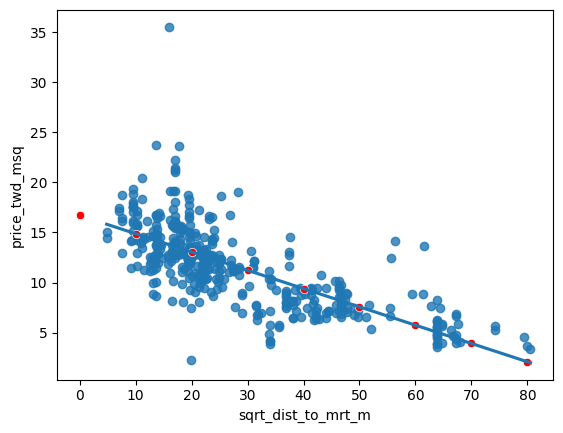

In [68]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)


# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

#### **Transforming the response variable too**


In [69]:
ad_conversion = pd.read_csv(url_ad_conversion)

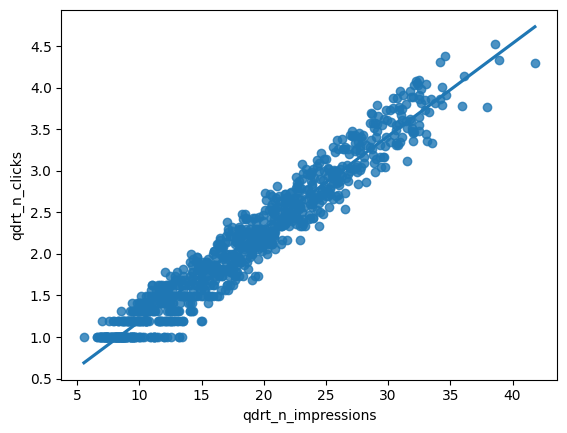

In [70]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
plt.show()

In [71]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [72]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


#### **Back transformation**

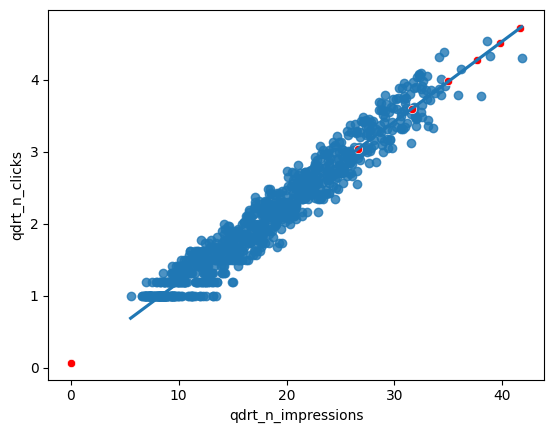

In [73]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()

# **3️⃣Assessing model fit**

## **Quantifying model fit**

#### **Coefficient of determination**

In [74]:
mdl_bream = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.22e-16
Time:                        20:59:58   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [75]:
# get ".rsquared attribute" as a float
print(mdl_bream.rsquared)

0.8780627095147174


In [76]:
# Given the simple linear regression, r-squared is just the squared value of the correlation between response and explanatory variables
coeff_determination = bream["length_cm"].corr(bream["mass_g"]) ** 2
print(coeff_determination)

0.8780627095147171


In [77]:
# Mean square error (MSE)
## MSE = RSE ** 2
mse = mdl_bream.mse_resid
print("MSE: ", mse)

MSE:  5498.55508497352


In [78]:
rse = np.sqrt(mse)
print("RSE: ", rse)

RSE:  74.15224261594197


#### **Residual standard error**

In [79]:
# Calculating the RSE 
# we take the residuals squared

## compute square residuals
residuals_sq = mdl_bream.resid ** 2
print("residuals sq: \n", residuals_sq)

residuals sq: 
 0       138.957118
1       260.758635
2      5126.992578
3      1318.919660
4       390.974309
5       547.938023
6      5388.745625
7      6437.159178
8       409.330131
9       373.528738
10     1511.024102
11      914.269381
12     2709.918769
13    54698.391492
14      997.178016
15      997.178016
16     5933.335069
17     5933.335069
18     1619.808598
19       32.511024
20     9421.971076
21       55.922933
22     3966.081668
23      374.106336
24       23.009547
25      658.341757
26       95.026919
27     1185.893986
28     9236.784264
29    43232.058660
30     2125.047026
31     6576.923291
32      206.259713
33      889.335096
34     7665.302003
dtype: float64


In [80]:
# compute sum of square residuals
resid_sum_of_sq = sum(residuals_sq)

# compute degree of freedom
## it's the number of observations minus the number of model coefficients
deg_freedom = len(bream.index) - 2

# print the degree of freedom
print(f"Degree of freedom: {deg_freedom}")

# compute RSE
rse = np.sqrt(resid_sum_of_sq / deg_freedom)

# print RSE
print(f"RSE: {rse}")

Degree of freedom: 33
RSE: 74.15224261594197


In [81]:
# Root-mean-sqare error (RMSE)
## here we don't subtract degrees of freedom

n_obs = len(bream.index)
rmse = np.sqrt(resid_sum_of_sq / n_obs)

# print RMSE
print(f"RMSE: {rmse}")

RMSE: 72.00244396727619


## **Visualizing model fit**

When a model has good fit, we expect it to have its errors normally distributed, and with mean zero:  

- Scatter plot with trend line.  
- Residuals vs. fitted plot. 
- Q-Q plot (show's whether or not residuals follow a normal distribution).  
- Scale-location plot. 

### **Drawing diagnostic plots**

**`residplot`**  

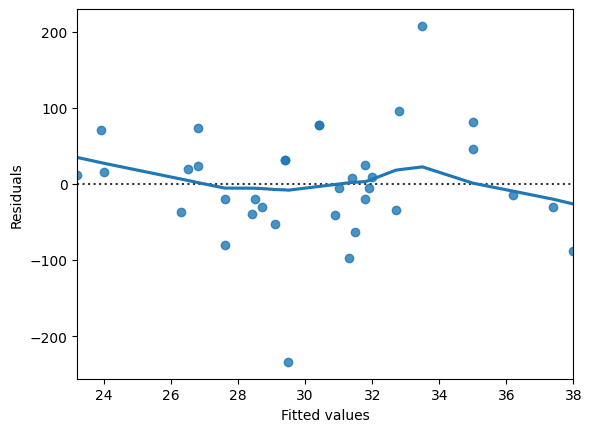

In [82]:
# Create residual plot for the "bream" model
# If option "lowess" is set to "True", statsmodels estimates a nonparametric lowess model (locally weighted linear regression)

sns.residplot(x="length_cm", y="mass_g", data=bream, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

`lowess` stands for "`locally weighted scatterplot smoothing`" It is an algorithm used to estimate a **nonparametric regression model** or smooth the scatterplot of two variables.

When ``lowess=True` is set in the `sns.residplot()` function, it means that the residplot function will estimate a lowess model on the data points.

The lowess model fits a smooth curve through the scatterplot by assigning weights to each data point based on its proximity to the point being predicted.

**`Q-Q plot`**

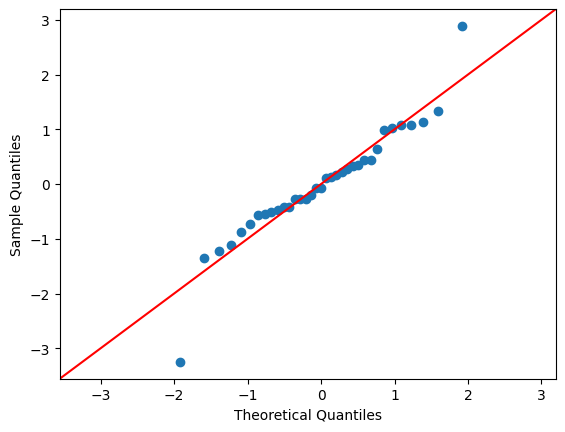

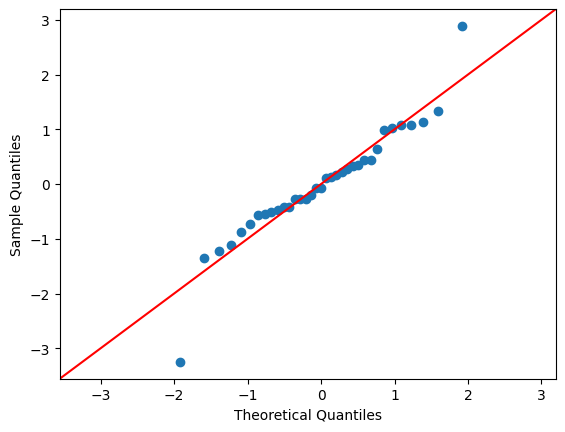

In [83]:
from statsmodels.api import qqplot

# Drawing a Q-Q plot of residuals
qqplot(data=mdl_bream.resid, fit=True, line="45")

**`Scale-location plot`**

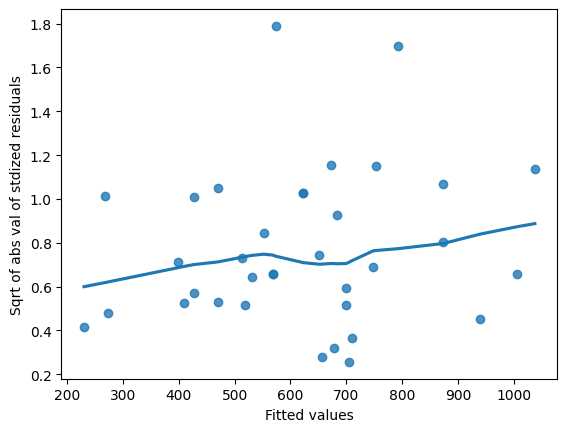

In [84]:
# normalize residuals from the model
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal

# standardize residuals
# take square roots of absolute values of the residuals
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))

# plot the graph
sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")
plt.show()

## **Outliers, leverage, and influence**

In [85]:
# extract "Roach" dataset from fish dataset
roach = fish[fish['species'] == "Roach"]
print(roach.head())

   species  mass_g  length_cm
35   Roach    40.0       12.9
36   Roach    69.0       16.5
37   Roach    78.0       17.5
38   Roach    87.0       18.2
39   Roach   120.0       18.6


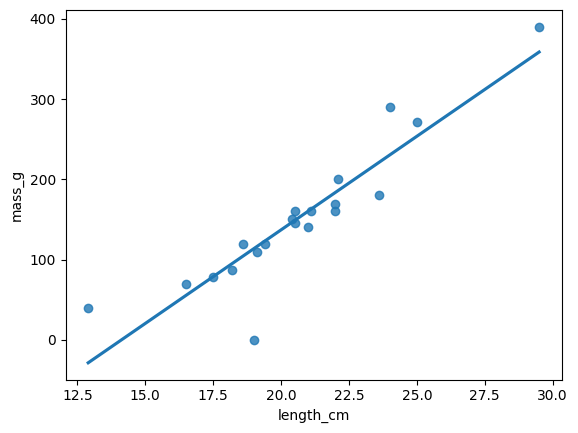

In [86]:
# Which points are outliers?

sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None)
plt.show()

<ipython-input-87-f4bf076d1f15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["extreme_l"] = ((roach["length_cm"] < 15) | (roach["length_cm"] > 26))


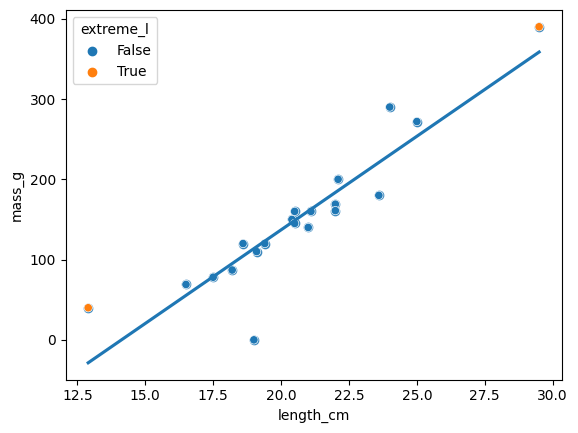

In [87]:
# Extreme explanatory values
roach["extreme_l"] = ((roach["length_cm"] < 15) | (roach["length_cm"] > 26))

fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None)

sns.scatterplot(x="length_cm", y="mass_g", data=roach, hue="extreme_l")
# "hue" option: Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
plt.show()

<ipython-input-88-37e1f19b2a0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["extreme_m"] = (roach["mass_g"] < 1)


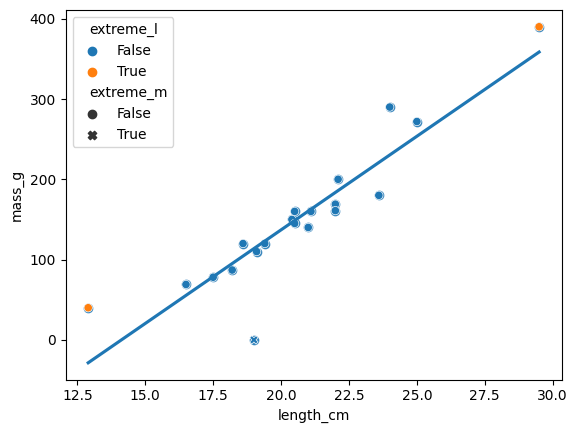

In [88]:
# Response values away from the regression line
roach["extreme_m"] = (roach["mass_g"] < 1)

fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None)

sns.scatterplot(x="length_cm", y="mass_g", data=roach, hue="extreme_l", style="extreme_m")
plt.show()

### __Leverage and influence__:  

- __Leverage__: is a measure of how unusual or extreme the explanatory variable is for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.  

- __Influence__: measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.  

**Note:** `Leverage` has to do with the explanatory variables, while `influence` deals with the response variable. 

In [89]:
# Obtaining "Leverage" for the roach model

# fit an OLS model
mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()

# use the .get_influence() .summary_frame() methods
summary_roach = mdl_roach.get_influence().summary_frame()

# the leverage is available in the "hat" matrix
roach["leverage"] = summary_roach["hat_diag"]

# print the roach dataset, with the "leverage" column
print(roach.head())

   species  mass_g  length_cm  extreme_l  extreme_m  leverage
35   Roach    40.0       12.9       True      False  0.313729
36   Roach    69.0       16.5      False      False  0.125538
37   Roach    78.0       17.5      False      False  0.093487
38   Roach    87.0       18.2      False      False  0.076283
39   Roach   120.0       18.6      False      False  0.068387


<ipython-input-89-f4ff778d1c79>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["leverage"] = summary_roach["hat_diag"]


In [90]:
# print again, but removing the 'extreme_l' and 'extreme_m' columns
print(roach.drop(['extreme_l', 'extreme_m'], axis=1).head())

   species  mass_g  length_cm  leverage
35   Roach    40.0       12.9  0.313729
36   Roach    69.0       16.5  0.125538
37   Roach    78.0       17.5  0.093487
38   Roach    87.0       18.2  0.076283
39   Roach   120.0       18.6  0.068387


In [91]:
# now let's obtain the influence.
# Cook's distance is the most common measure of influence.
# Cook's distance calculates influence based on the residual size and the leverage of the point
# Cook's distance is already stored in the regression's summary frame as "cooks_d"

roach["cooks_dist"] = summary_roach["cooks_d"]
print(roach.head())

   species  mass_g  length_cm  extreme_l  extreme_m  leverage  cooks_dist
35   Roach    40.0       12.9       True      False  0.313729    1.074015
36   Roach    69.0       16.5      False      False  0.125538    0.010429
37   Roach    78.0       17.5      False      False  0.093487    0.000020
38   Roach    87.0       18.2      False      False  0.076283    0.001980
39   Roach   120.0       18.6      False      False  0.068387    0.006610


<ipython-input-91-ffecafd4251a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roach["cooks_dist"] = summary_roach["cooks_d"]


In [92]:
# We can find the most influential roaches in the dataset, by arranging the rows by descending cook's distance values
print(roach.sort_values("cooks_dist", ascending = False))

   species  mass_g  length_cm  extreme_l  extreme_m  leverage  cooks_dist
35   Roach    40.0       12.9       True      False  0.313729    1.074015
54   Roach   390.0       29.5       True      False  0.394740    0.365782
40   Roach     0.0       19.0      False       True  0.061897    0.311852
52   Roach   290.0       24.0      False      False  0.099488    0.150064
51   Roach   180.0       23.6      False      False  0.088391    0.061209
53   Roach   272.0       25.0      False      False  0.133386    0.020615
49   Roach   161.0       22.0      False      False  0.058072    0.011516
36   Roach    69.0       16.5      False      False  0.125538    0.010429
46   Roach   140.0       21.0      False      False  0.050554    0.007950
39   Roach   120.0       18.6      False      False  0.068387    0.006610
48   Roach   169.0       22.0      False      False  0.058072    0.004817
50   Roach   200.0       22.1      False      False  0.059308    0.004519
45   Roach   160.0       20.5      Fal

At the top, we see how the largest values of influence (i.e., the Cook's distance) are associated with:  
- really short roaches  
- really long roaches  
- roaches with zero mass  

The observations with the most influence are also the most extreme (i.e., highest leverage values).

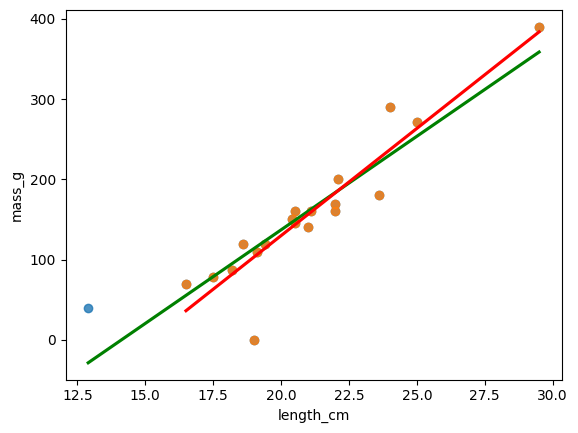

In [93]:
# To see how influence works
# let's remove the most influential roach

# filter out the roach with 12.9 cm in length
roach_not_short = roach[roach["length_cm"] != 12.9]

# create new regression plots 
sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None, line_kws={"color": "green"})

sns.regplot(x="length_cm", y="mass_g", data=roach_not_short, ci=None, line_kws={"color": "red"})

plt.show()

# **4️⃣Simple Logistic Regression Modeling**

**Why do we need logistic regression?**

- Logistic regression is used for binary classification problems.
- It provides predicted probabilities for each class.
- Logistic regression allows for the interpretation of the impact of independent variables on the outcome.
- It assumes a linear relationship between the independent variables and the log-odds.
- Logistic regression is computationally efficient and can handle large datasets.
- It requires a smaller sample size compared to other algorithms.
- Logistic regression is easier to interpret compared to more complex models.
- It may not perform well with complex interactions or non-linear relationships in the data.


In [94]:
# load the "churn" dataset
churn = pd.read_csv(url_churn)
churn.head(5)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


- `has_churned`: A binary variable indicating whether a customer has churned (`1`) or not (`0`).

- `time_since_first_purchase`: The duration in time since the customer made their first purchase or started their relationship with the company. It measures the length of the customer's overall engagement with the company.

- `time_since_last_purchase`: The duration in time since the customer made their most recent purchase. It measures the length of time that has passed since the customer's last transaction with the company.

In [95]:
# show summary statistics of the "churn" data
churn.describe()

,has_churned,time_since_first_purchase,time_since_last_purchase
count,400.000000,400.000000,400.000000
mean,0.500000,-0.034370,0.144549
std,0.500626,0.952936,1.103133
min,0.000000,-1.273770,-0.870666
25%,0.000000,-0.828377,-0.645824
50%,0.500000,-0.152072,-0.265036
75%,1.000000,0.544826,0.571214
max,1.000000,3.738312,5.928242


In [96]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
has_churned,400.0,0.500000,0.500626,0.000000,0.000000,0.500000,1.000000,1.000000
time_since_first_purchase,400.0,-0.034370,0.952936,-1.273770,-0.828377,-0.152072,0.544826,3.738312
time_since_last_purchase,400.0,0.144549,1.103133,-0.870666,-0.645824,-0.265036,0.571214,5.928242


In [97]:
from statsmodels.formula.api import ols

# Creating the model of "Churn Vs Recency"  
mdl_churn_vs_recency_lm = ols(formula="has_churned ~ time_since_last_purchase", data=churn).fit()
print(mdl_churn_vs_recency_lm.params)
print(mdl_churn_vs_recency_lm.summary())

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            has_churned   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     8.020
Date:                Mon, 12 Jun 2023   Prob (F-statistic):            0.00486
Time:                        21:00:03   Log-Likelihood:                -286.33
No. Observations:                 400   AIC:                             576.7
Df Residuals:                     398   BIC:                             584.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [98]:
# Retrieve intercept and slopes from the linear model
intercept, slope = mdl_churn_vs_recency_lm.params

print(intercept, slope )

0.4907801522274007 0.06378347043715513


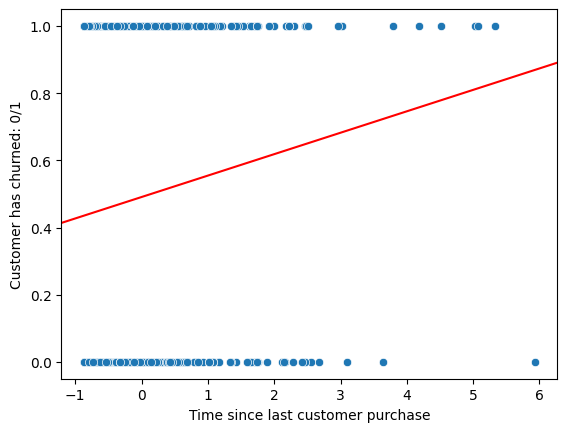

In [99]:
# let's visualize the linear model, using a scatterplot
sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=churn)

# ploting the  straight line on a graph.
plt.axline(xy1=(0, intercept), slope=slope, color="red") # X-coordinate is set to 0, y-coordinate of the intercept point. 

plt.xlabel("Time since last customer purchase")
plt.ylabel("Customer has churned: 0/1")
plt.show()

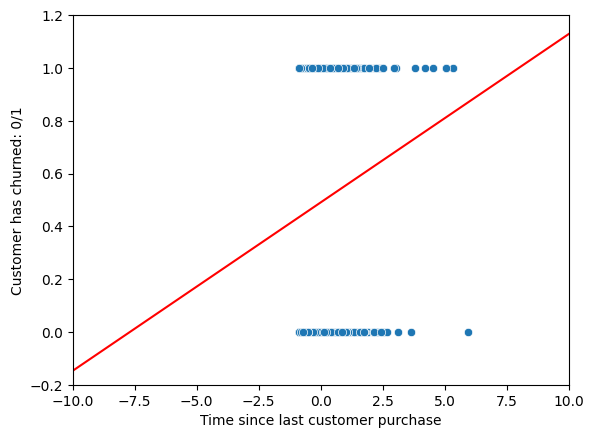

In [100]:
# let's zoom out, to take a closer look at the plot
# we'll augment the x and y axes values

sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=churn)

# let's use "plt.axline()" rather than "sns.regline()", so the line isn't limited to the extent of the data.
plt.axline(xy1=(0, intercept), slope=slope, color="red")

# augment the x and y axes values on the plot
plt.xlim(-10,10)
plt.ylim(-0.2,1.2)

plt.xlabel("Time since last customer purchase")
plt.ylabel("Customer has churned: 0/1")
plt.show()

In the bottom-left, the model predicts probabilites less than one.  
In the top-right, the model predicts probabilites greater than one.  
Both situations are impossible.



**Let's run a Logistic Regression model**

In [101]:
# import the ".logit()" module from Statsmodels
from statsmodels.formula.api import logit

# fit a logistic regression model on the churn dataset
mdl_churn_vs_recency_logit = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

# print model parameters
print(mdl_churn_vs_recency_logit.params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


In [102]:
# Now let's print the model summary table
print(mdl_churn_vs_recency_logit.summary())

                           Logit Regression Results                           
Dep. Variable:            has_churned   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                 0.01464
Time:                        21:00:03   Log-Likelihood:                -273.20
converged:                       True   LL-Null:                       -277.26
Covariance Type:            nonrobust   LLR p-value:                  0.004384
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0350      0.102     -0.345      0.730      -0.234       0.164
time_since_last_purchase     0.2692      0.098      2.744      0.006       0.077       0.

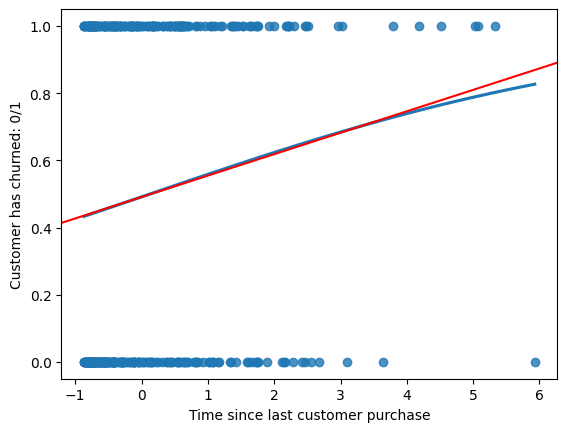

In [103]:
# Let's visualize the logistic model, using "sns.regplot()"
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)

plt.axline(xy1=(0, intercept), slope=slope, color="red")

plt.xlabel("Time since last customer purchase")
plt.ylabel("Customer has churned: 0/1")
plt.show()

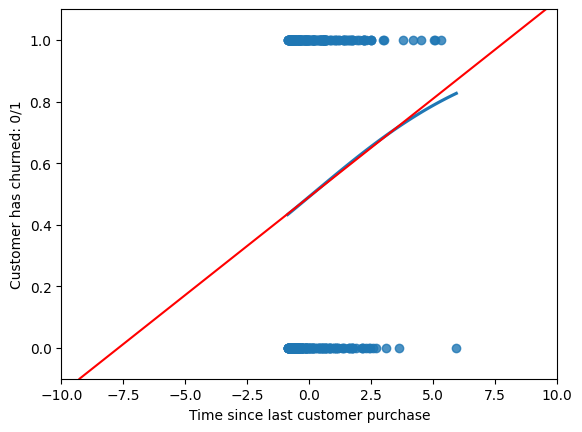

In [104]:
# let's zoom out to make sure predicted values from the logistic regression are always within 0-1

sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)

plt.axline(xy1=(0, intercept), slope=slope, color="red")

# augment the x and y axes values on the plot
plt.xlim(-10,10)
plt.ylim(-0.1,1.1)

plt.xlabel("Time since last customer purchase")
plt.ylabel("Customer has churned: 0/1")
plt.show()

Conclusion: Customers who recently boughts things are less likely to churn (and vice-versa)!

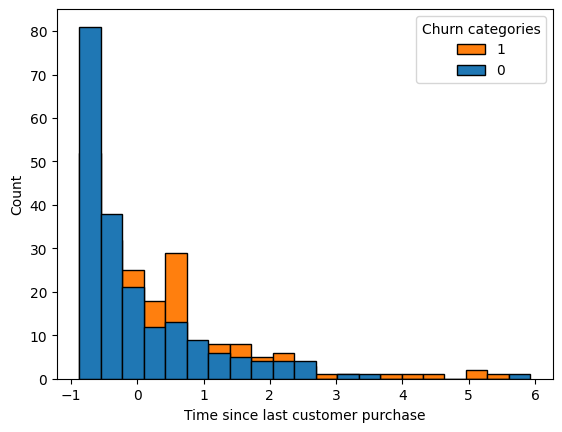

In [105]:
# Exploring the explanatory variables

# Create the histograms of time_since_last_purchase split by has_churned
sns.histplot(x="time_since_last_purchase", hue="has_churned", data=churn, alpha=1)

# change label of x-axis
plt.xlabel("Time since last customer purchase")

# change legend
plt.legend('10', title="Churn categories", loc='upper right')

# Show the plot
plt.show()

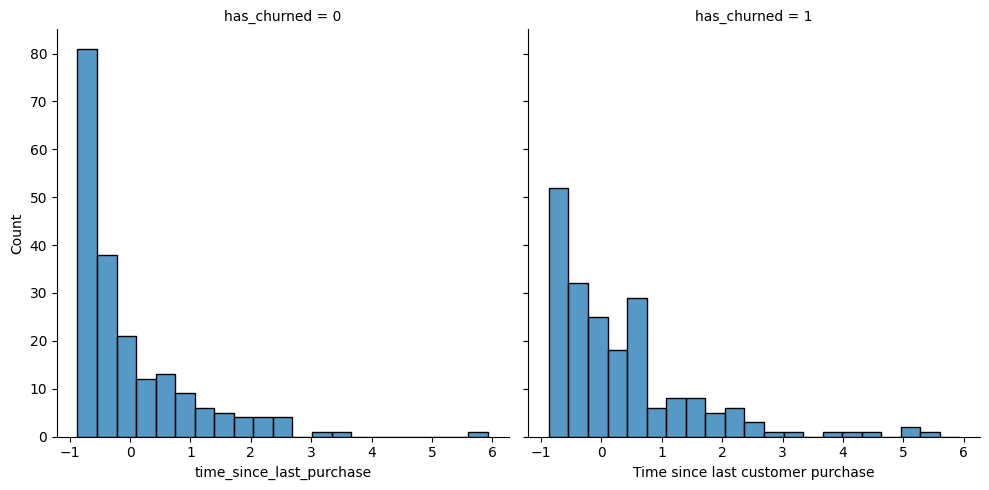

In [106]:
# creating a distribution plot instead: 
# Create the histograms of time_since_last_purchase: split by "has_churned"
sns.displot(data=churn,
            x="time_since_last_purchase",
            col="has_churned")

# change label of x-axis
plt.xlabel("Time since last customer purchase")

# Show the plot
plt.show()

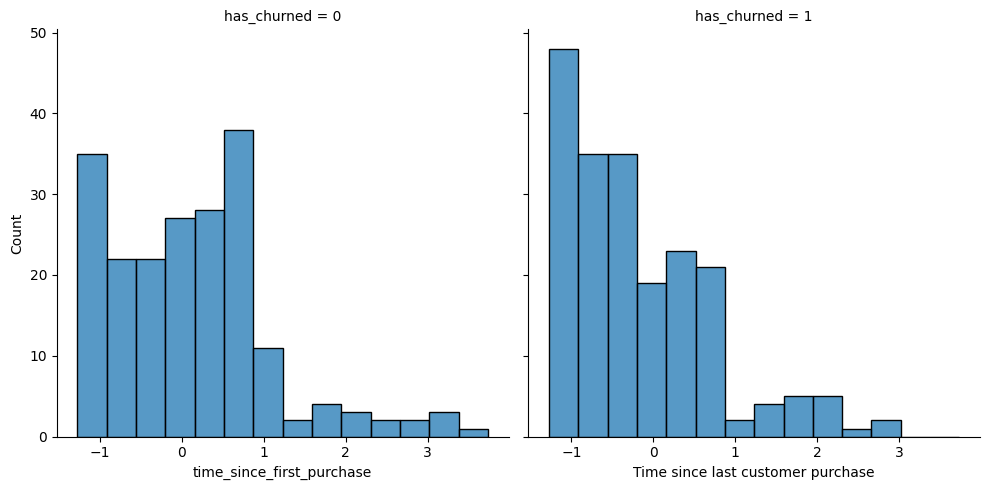

In [107]:
# same as above, by using "time_since_first_purchase": split by "has_churned"
sns.displot(data=churn,
            x="time_since_first_purchase",
            col="has_churned")

# change label of x-axis
plt.xlabel("Time since last customer purchase")

# Show the plot
plt.show()

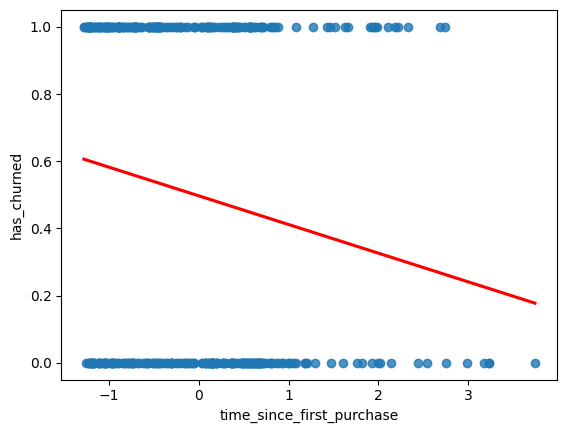

In [108]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase", y="has_churned", data=churn, ci=None,
            line_kws={"color": "red"})

# Show the plot
plt.show()

### Predictions and odds ratios


In [109]:
# Make predictions

mdl_recency = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

explanatory_data = pd.DataFrame({"time_since_last_purchase" : np.arange(-1, 6, 0.25)})

prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


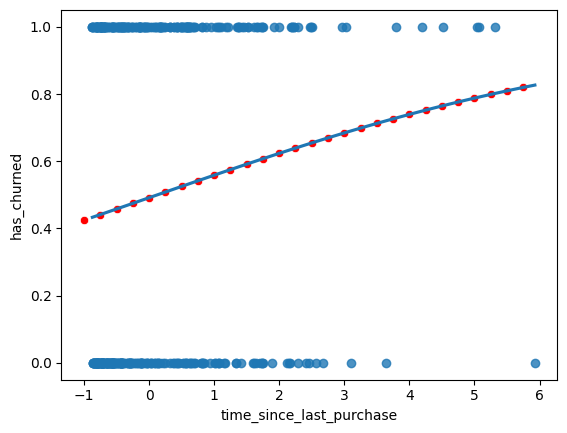

In [110]:
# Adding point predictions

# create a regression plot
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)

# add scatter plot of predictions
sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=prediction_data, color="red")

# show graph
plt.show()

In [111]:
# Getting the most likely outcome
## just round the predicted probabilities, using Numpy's round() function
prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))

# Add new column for rounded values
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# preview the dataset
prediction_data.sample(10)

,time_since_last_purchase,has_churned,most_likely_outcome
17,3.25,0.698450,1.0
3,-0.25,0.474441,0.0
15,2.75,0.669367,1.0
2,-0.50,0.457695,0.0
1,-0.75,0.441043,0.0
26,5.50,0.809330,1.0
4,0.00,0.491246,0.0
23,4.75,0.776216,1.0
20,4.00,0.739205,1.0
5,0.25,0.508070,1.0


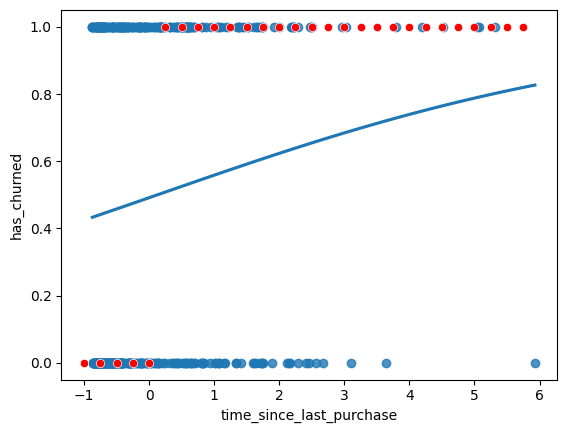

In [112]:
# Let's visualize the most likely outcome

# create a regression plot
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)

# add scatter plot of predictions
sns.scatterplot(x="time_since_last_purchase", y="most_likely_outcome", data=prediction_data, color="red")

# show graph
plt.show()

### Odds ratios  
The _odds ratio_ is the probability of something happening, divided by the probability that it doesn't.

$ odds\_ratio = \frac{probability}{1-probability} $

For example:  

$ odds\_ratio = \frac{0.25}{1-0.25} = \frac{1}{3} $

In [113]:
# Let's compute the odds ratios and add them to the prediction data
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

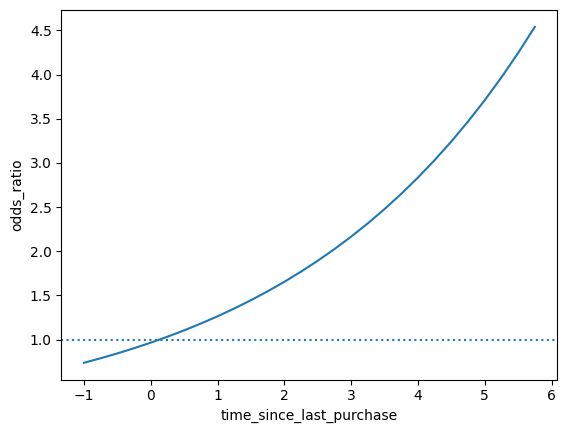

In [114]:
# Let's visualize the odds ratio from the churn model

sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data)

# Add a horizontal dotted line at "y = 1"
plt.axhline(y=1, linestyle="dotted")

# show plot
plt.show()

In the bottom left, the chances of churning are less than the chances of not churning. And vice-versa in the upper-right.

<font color="red"> On a log-scale, odds ratios change linearly with the explanatory variable. </font>

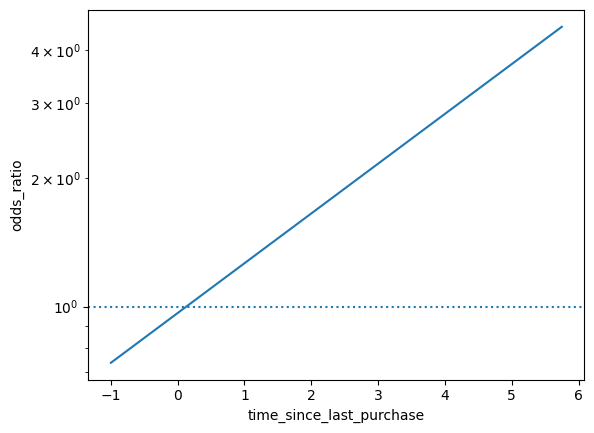

In [115]:
# Let's visualize log odds ratios

sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data)

# Add a horizontal dotted line at "y = 1"
plt.axhline(y=1, linestyle="dotted")

# let's change the scale of the y-axis to "log"
plt.yscale("log")

# show plot
plt.show()

<font color="red"> The log odds ratio is also known as "logit". </font>

In [116]:
# Calculate log odds ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print prediction data
prediction_data.sample(10)

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
2,-0.50,0.457695,0.0,0.843980,-0.169627
1,-0.75,0.441043,0.0,0.789046,-0.236931
19,3.75,0.726023,1.0,2.649939,0.974537
8,1.00,0.558283,1.0,1.263892,0.234196
7,0.75,0.541626,1.0,1.181626,0.166892
11,1.75,0.607331,1.0,1.546674,0.436107
22,4.50,0.764309,1.0,3.242835,1.176448
12,2.00,0.623260,1.0,1.654354,0.503410
24,5.00,0.787690,1.0,3.710087,1.311055
10,1.50,0.591170,1.0,1.446003,0.368803


## Quantifying logistic regression fit  

### Confusion matrix: counts of outcomes  

A _confusion matrix (occasionally called a confusion table)_ is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. True positive: The customer churned and the model predicted they would.  
2. False positive: The customer didn't churn, but the model predicted they would.  
3. True negative: The customer didn't churn and the model predicted they wouldn't.  
4. False negative: The customer churned, but the model predicted they wouldn't.

In [117]:
# Let's create the confusion matrix manually

## Let's use the "recency model" above

# get the actual responses
actual_response = churn["has_churned"]

# compute predicted responses, and round them ==> Most likely outcomes
predicted_response = np.round(mdl_recency.predict())

# create a DataFrame of "actual vs. predicted" ouctomes
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})

# print value counts of outcomes
print(outcomes.value_counts(sort=False))

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
dtype: int64


We correctly predicted that 141 customers didn't churn, and 89 did churn. There were 59 false positives and 111 false negatives.

In [118]:
# Now let's create the confusion matrix automatically

conf_matrix = mdl_recency.pred_table()
print(conf_matrix)

[[141.  59.]
 [111.  89.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

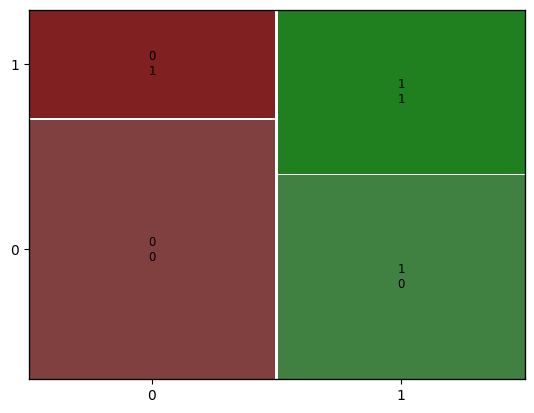

In [119]:
# Let's plot the confusion matrix

## import necessary python library
from statsmodels.graphics.mosaicplot import mosaic

# plot the confusion matrix
mosaic(conf_matrix)

<font color="red"> NOTE: Look at the dimensions of the confusion matrix:  
- The width of each column is proportional to the fraction of observations in each category of actual values.  
- each column displays the fraction of predicted observations with each value. </font>

### Model accuracy  

_Accuracy_ is the proportion of correct predictions. 

$ accuracy = \frac{TN + TP}{TN + FN + FP + TP } $

In [120]:
# let's retrieve the numbers manually
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# compute "accuracy" manually
acc = (TN + TP) / (TN + TP + FN + FP)
print(acc)

0.575


<font color="red"> Higher accuracy is better. </font>

### Model sensitivity  

_Sensitivity_ is the proportion of true positives.  

$ sensitivity = \frac{TP}{FN + TP} $

In [121]:
# compute "sensitivity" manually
sens = (TP) / (FN + TP)
print(sens)

0.445


<font color="red"> Higher sensitivity is better. </font>

### Model specificity  

_Specificity_ is the proportion of true negatives.  

$ specificity = \frac{TN}{TN + FP} $

In [122]:
# compute "specificity" manually
spec = (TN) / (TN + FP)
print(spec)

0.705


<font color="red"> Higher specificity is better, though there's often a trade-off where higher specificity will decrease sensitivity, or increasing sensitivity will decrease specificity. </font>

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/